## Distribuição de Respiradores pelo Ministério da Saúde em 2020.
##### Esta base de dados contém informações sobre respiradores distribuídos pelo Ministério da Saúde a estados e municípios.
##### Os dados disponibilizados pelo Poder Executivo Federal em formato aberto são de livre utilização e reúso, observados os termos constantes do inc. IV do art. 3º e do art. 4 do Decreto nº 8777/16.
###### Fonte: https://dados.gov.br/dataset/distribuicao-de-respiradores

#### Dicionário de dados:
| Dado       | Descrição                                                                                                     |
|------------------------|---------------------------------------------------------------------------------------------------------------|
| Data                    | Data de solicitação de entrega à distribuidora                                   |
| Fornecedor          |  Nome da empresa fornecedora dos equipamentos                                                                    |
| Destino            | Estado de destino do respirador                                                       |
| Estado/Municipio               | tipo de unidade da federação que será o destino da entrega                                                                   |
| Tipo                     | Tipo do equipamento                                                                 |
| Quantidade                     | Unidades entregues                                |
| Valor             | Valor total da entrega em real                                                                  |
| Destinatario       | Entidade que recebeu o bem          |
| UF         |  UF de entrega                                 |
| Data de Entrega | Data de entrega no destinatário |


## Carregamento de Dados
### Dataframe gerado a partir do arquivo .csv 

In [42]:
import numpy as np
from numpy import nan as NA
import pandas as pd
import re
import matplotlib.pyplot as plt
#import seaborn as sea

In [183]:
from __future__ import unicode_literals

data = pd.read_csv('dataset/distribuicao_respiradores.csv', sep=';', encoding='utf-8')

data.head()

,DATA,FORNECEDOR,DESTINO,ESTADO/MUNICIPIO,TIPO,QUANTIDADE,VALOR,DESTINATARIO,UF,DATA DE ENTREGA
0,19/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,40,"2400000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,19/04/2020
1,22/04/2020,VYAIRE,RIO DE JANEIRO,ESTADO,UTI,20,"1200000,00",LABORATÓRIO QUÍMICO FARMACÊUTICO DE AERONÁUTICA,RJ,23/04/2020
2,08/05/2020,MAGNAMED,RIO DE JANEIRO,ESTADO,UTI,25,"1500000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
3,08/05/2020,KTK,RIO DE JANEIRO,ESTADO,UTI,15,"900000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020
4,09/05/2020,LEISTUNG,RIO DE JANEIRO,ESTADO,UTI,6,"360000,00",ALMOXARIFADO ESTADUAL DE MEDICAMENTOS - RIO DE...,RJ,09/05/2020


## Limpeza e Normalização de Dados
1) Normalizar a coluna "DESTINATARIO" para que informe apenas o município. 

2) Normalizar a coluna "DATA DE ENTREGA" para o padrão dd/mm/YYYY

3) Eliminar linhas com alguma informação vazia. 

4) Eliminar linhas duplicadas nos dados das colunas

5) Normalizar os dados para um melhor entendimento. 

6) Conversão da tipagem da coluna VALOR

## Questões de Pesquisa
1) Quais foram as Unidades Federativas que mais receberam respiradores?

2) Quais foram os fornecedores que mais disponibilizaram respiradores?

3) Quais foram as Unidades Federativas que mais gastaram em respiradores?

4) Qual foi o gasto mensal em respiradores em todos os estados?

5) Qual é a demanda dos tipos de respiradores das cidades do Rio Grande Sul?

6) Qual foi o gasto mensal em respiradores no estado do Rio Grande do Sul?

7) Quais são os destinatários com mais quantidade de respiradores no estado do Rio Grande do Sul?

8) Quantos respiradores o município de Alegrete/RS recebeu em relação à capital do Estado?

### 1) Normalização da coluna "DESTINATARIO" para que informe apenas o município. 
##### OBS: essa limpeza foi executada apenas nas linhas referentes ao estado do Rio Grande do Sul.

In [76]:
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (Porto Alegre) ', 'Porto Alegre', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (Porto Alegre)', 'Porto Alegre', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (ALVORADA)', 'Alvorada', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (BAGÉ)', 'Bagé', inplace = True)
data['DESTINATARIO'].replace('SMS de Bage', 'Bagé', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (CAXIAS DO SUL)', 'Caxias do Sul', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (LIVRAMENTO)', 'Santana do Livramento', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (PASSO FUNDO)', 'Passo Fundo', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (RIO PARDO)', 'Rio Pardo', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (SANANDUVA)', 'Sananduva', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde - (SANTA CRUZ DO SUL)', 'Santa Cruz do Sul', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (SÃO LEOPOLDO)', 'São Leopoldo', inplace = True)
data['DESTINATARIO'].replace('Secretaria Municipal de Saúde (VACARIA)', 'Vacaria', inplace = True)
data['DESTINATARIO'].replace('ALEGRETE - Hospital Santa Casa de Alegrete', 'Alegrete', inplace = True)
data['DESTINATARIO'].replace('CACHOEIRINHA - HOSPITAL PADRE JEREMIAS', 'Cachoeirinha', inplace = True)
data['DESTINATARIO'].replace('CAMAQUÃ - Hospital Nossa Senhora de Camaquã', 'Camaquã', inplace = True)
data['DESTINATARIO'].replace('CANGUÇU - Hospital de Canguçu', 'Canguçu', inplace = True)
data['DESTINATARIO'].replace('CANOAS - Hospital Nossa Senhora das Graças', 'Canoas', inplace = True)
data['DESTINATARIO'].replace('CANOAS - HPS Canoas', 'Canoas', inplace = True)
data['DESTINATARIO'].replace('CARAZINHO - Hospital Comunitário de Carazinho', 'Carazinho', inplace = True)
data['DESTINATARIO'].replace('CAXIAS DO SUL - Hospital Pio Sodal Damas Caridade', 'Caxias do Sul', inplace = True)
data['DESTINATARIO'].replace('CAXIAS DO SUL - Hospital Virvi Ramos', 'Caxias do Sul', inplace = True)
data['DESTINATARIO'].replace('GRAVATAÍ - Hospital Dom João Becker', 'Gravataí', inplace = True)
data['DESTINATARIO'].replace('IJUÍ - Hospital Caridade de Ijuí', 'Ijuí', inplace = True)
data['DESTINATARIO'].replace('MONTENEGRO - HOSPITAL MONTENEGRO', 'Montenegro', inplace = True)
data['DESTINATARIO'].replace('PAROBÉ - Hospital São Francisco de Assis', 'Parobé', inplace = True)
data['DESTINATARIO'].replace('PORTO ALEGRE - Hospital Vilanova', 'Porto Alegre', inplace = True)
data['DESTINATARIO'].replace('SANTA CRUZ DO SUL - Hospital Ana Nery', 'Santa Cruz do Sul', inplace = True)
data['DESTINATARIO'].replace('SANTA ROSA - HOSPITAL VIDA E SAUDE ABOSCO', 'Santa Rosa', inplace = True)
data['DESTINATARIO'].replace('SANTANA DO LIVRAMENTO - Santa Casa de Santana do Livramento', 'Santana do Livramento', inplace = True)
data['DESTINATARIO'].replace('SÃO GABRIEL - Hospital Santa Casa de São Gabriel', 'São Gabriel', inplace = True)
data['DESTINATARIO'].replace('SÃO JERÔNIMO - Hospital de Caridade São Jerônimo', 'São Jerônimo', inplace = True)
data['DESTINATARIO'].replace('SÃO LEOPOLDO - HOSPITAL CENTENÁRIO', 'São Leopoldo', inplace = True)
data['DESTINATARIO'].replace('SÃO LUIZ GONZAGA - Hopsital São Luiz Gonzaga', 'São Luiz Gonzaga', inplace = True)
data['DESTINATARIO'].replace('SAPIRANGA - HOSPITAL SAPIRANGA', 'Sapiranga', inplace = True)
data['DESTINATARIO'].replace('TAQUARA - Hospital Bom Jesus', 'Taquara', inplace = True)
data['DESTINATARIO'].replace('URUGUAIANA - Santa Casa de Uruguaiana', 'Uruguaiana', inplace = True)
data['DESTINATARIO'].replace('VACARIA - Hospital Nossa Senhora da Oliveira', 'Vacaria', inplace = True)
data['DESTINATARIO'].replace('PORTO ALEGRE - Secretaria Municipal de Saúde ', 'Porto Alegre', inplace = True)
data['DESTINATARIO'].replace('Porto Alegre - SMS (Irmandade da Santa Casa de Misericórdia de Porto Alegre)', 'Porto Alegre', inplace = True)
data['DESTINATARIO'].replace('CAMBARA DO SUL - Secretaria Municipal de Saúde ', 'Cambara do Sul', inplace = True)
data['DESTINATARIO'].replace('CANELA - Secretaria Municipal de Saúde ', 'Canela', inplace = True)
data['DESTINATARIO'].replace('CRUZEIRO DO SUL - Secretaria Municipal de Saúde ', 'Cruzeiro do Sul', inplace = True)
data['DESTINATARIO'].replace('PELOTAS - Secretaria Municipal de Saúde ', 'Pelotas', inplace = True)
data['DESTINATARIO'].replace('SAO JOSE DO NORTE - Secretaria Municipal de Saúde ', 'São José do Norte', inplace = True)
data['DESTINATARIO'].replace('SAO LOURENCO DO SUL - Secretaria Municipal de Saúde ', 'São Lourenço do Sul', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE CAMAQUA  RS', 'Camaquã', inplace = True)
data['DESTINATARIO'].replace('SMS de Cambara do Sul', 'Cambará do Sul', inplace = True)
data['DESTINATARIO'].replace('SMS de Novo Hamburgo', 'Novo Hamburgo', inplace = True)
data['DESTINATARIO'].replace('SMS de Porto Alegre', 'Porto Alegre', inplace = True)
data['DESTINATARIO'].replace('SMS de Rio Grande', 'Rio Grande', inplace = True)
data['DESTINATARIO'].replace('SMS de Santa Vitoria do Palmar', 'Santa Vitória do Palmar', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE ERVAL GRANDE  RS', 'Erval Grande', inplace = True)
data['DESTINATARIO'].replace('SMS DE  CORONEL BICACO  RS', 'Coronel Bicaco', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE CAMPINA DAS MISSOES', 'Campina das Missões', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE IRAI  RS', 'Iraí', inplace = True)
data['DESTINATARIO'].replace('SMS DE TRES DE MAIO  RS', 'Três de Maio', inplace = True)
data['DESTINATARIO'].replace('SMS DE GIRUA  RS', 'Giruá', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE  FREDERICO WESTPHAL', 'Frederico Westphalen', inplace = True)
data['DESTINATARIO'].replace('SMS de Encantado', 'Encantado', inplace = True)
data['DESTINATARIO'].replace('SMS DE GUARANI DAS MISSOES  RS', 'Guarani das Missões', inplace = True)
data['DESTINATARIO'].replace('SMS de Charqueadas', 'Charqueadas', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE PEDRO OSORIO  RS', 'Pedro Osório', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE PEDRO OSORIO\xa0 RS', 'Pedro Osório', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE SAO FRANCISCO DE PA', 'São Francisco de Paula', inplace = True)
data['DESTINATARIO'].replace('SMS de Sao Luiz Gonzaga', 'Luiz Gonzaga', inplace = True)
data['DESTINATARIO'].replace('SMS de Capao da Canoa', 'Capão da Canoa', inplace = True)
data['DESTINATARIO'].replace('SMS DE MONTENEGRO  RS', 'Montenegro', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE PORTO XAVIER  RS', 'Porto Xavier', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE SANTO ANTONIO DA PA', 'Santo Antônio da Patrulha', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE TRES PASSOS  RS', 'Três Passos', inplace = True)
data['DESTINATARIO'].replace('SMS de Dom Pedrito', 'Dom Pedrito', inplace = True)
data['DESTINATARIO'].replace('SMS de Sao Jeronimo', 'São Jerônimo', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE CARAZINHO  RS', 'Carazinho', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE OSORIO  RS', 'Osório', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE MARIANA PIMENTEL  R', 'Mariana Pimentel', inplace = True)
data['DESTINATARIO'].replace('SMS de Santana do Livramento', 'Santana do Livramento', inplace = True)
data['DESTINATARIO'].replace('SMS de Rosario do Sul', 'Rosário do Sul', inplace = True)
data['DESTINATARIO'].replace('SMS de Cacapava do Sul', 'Caçapava do Sul', inplace = True)
data['DESTINATARIO'].replace('SECR. MUN. DE SAUDE DE CACHOEIRINHA', 'Cachoeirinha', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE SAO FRANCISCO DE PAULA', 'São Francisco de Paula', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE MUCUM  RS', 'Muçum', inplace = True)
data['DESTINATARIO'].replace('SECRETARIA MUNICIPAL DE SAUDE DE ITAQUI', 'Itaqui', inplace = True)
data['DESTINATARIO'].replace('SMS de Passo Fundo', 'Passo Fundo', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE DOIS LAJEADOS RS', 'Dois Lajeados', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE MUCUM RS', 'Muçum', inplace = True)
data['DESTINATARIO'].replace('SMS DE TUPANCIRETA RS', 'Tupanciretã', inplace = True)
data['DESTINATARIO'].replace('SMS DE PALMEIRA DAS MISSOES', 'Palmeira das Missões', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE ACEGUA RS', 'Aceguá', inplace = True)
data['DESTINATARIO'].replace('SMS de Cacequi', 'Cacequi', inplace = True)
data['DESTINATARIO'].replace('SMS de Jaguari', 'Jaquari', inplace = True)
data['DESTINATARIO'].replace('SMS DE MATA RS', 'Mata', inplace = True)
data['DESTINATARIO'].replace('SMS de Nova Esperanca do Sul', 'Nova Esperança do Sul', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE QUARAI RS', 'Quaraí', inplace = True)
data['DESTINATARIO'].replace('SMS de Sao Pedro do Sul', 'São Pedro do Sul', inplace = True)
data['DESTINATARIO'].replace('SMS de Sao Vicente do Sul', 'São Vicente do Sul', inplace = True)
data['DESTINATARIO'].replace('SMS de Unistalda', 'Unistalda', inplace = True)
data['DESTINATARIO'].replace('SECR MUN DE SAUDE DE SANTO AUGUSTO RS', 'Santo Augusto', inplace = True)


### 2) Normalizar a coluna "DATA DE ENTREGA" para o padrão dd/mm/YYYY

In [77]:
from datetime import datetime
data['DATA DE ENTREGA'].replace('29/102020 13:10', '29/10/2020', inplace = True)
data['DATA DE ENTREGA'].replace('30/10//2020 13:16', '30/10/2020', inplace = True)
data['DATA DE ENTREGA'].replace('31/04/2020', '30/04/2020', inplace = True)

for datas_entrega in data['DATA DE ENTREGA']:
    if(type(datas_entrega) == str):
        convertida = datetime.strptime(datas_entrega, "%d/%m/%Y")
        data['DATA DE ENTREGA'].replace(datas_entrega, convertida, inplace = True)

### 3) Eliminando linhas com alguma informação vazia. 

In [78]:
data['DATA'].replace('-', NA, inplace = True)
data['FORNECEDOR'].replace('-', NA, inplace = True)
data['DESTINO'].replace('-', NA, inplace = True)
data['ESTADO/MUNICIPIO'].replace('-', NA, inplace = True)
data['TIPO'].replace('-', NA, inplace = True)
data['QUANTIDADE'].replace('-', NA, inplace = True)
data['VALOR'].replace('-', NA, inplace = True)
data['DESTINATARIO'].replace('-', NA, inplace = True)
data['UF'].replace('-', NA, inplace = True)
data['DATA DE ENTREGA'].replace('-', NA, inplace = True)
data.dropna(how='any', inplace= True)

### 4) Eliminando linhas duplicadas nos dados das colunas


In [79]:
data.drop_duplicates(inplace= True)

### 5) Normalizando os dados para um melhor entendimento. 

In [80]:
data['TIPO'].replace('TRANSPORTE USA', 'Importado USA', inplace = True)
data['TIPO'].replace('TRANSPORTE', 'Nacional', inplace = True)
data['FORNECEDOR'].replace('VYAIRE LTV 2200 USA', 'Vyaire', inplace = True)
data['FORNECEDOR'].replace('VYAIRE LTV 1200 USA', 'Vyaire', inplace = True)
data['FORNECEDOR'].replace('VYAIRE USA', 'Vyaire', inplace = True)
data['FORNECEDOR'].replace('KTK/VYAIRE', 'KTK e Vyaire', inplace = True)
data['FORNECEDOR'].replace('LEISTUNG/VYAIRE', 'Leistung e Vyaire', inplace = True)
data['FORNECEDOR'].replace('MAGNAMED/REQUISIÇÃO', 'MAGNAMED', inplace = True)
data['FORNECEDOR'].replace('MAGNAMED-REQUISIÇÃO', 'MAGNAMED', inplace = True)
data['FORNECEDOR'].replace('SUZANO/Zhongxun Medical', 'Suzano e Zhongxun Medical', inplace = True)
data['FORNECEDOR'].replace('SUZANO/Resmed', 'Suzano e Resmed', inplace = True)
data['FORNECEDOR'].replace('L C DADDE COM AT INST MAT MEDICO EPP', 'L.C DADDE', inplace = True)

### 6) Conversão da tipagem da coluna VALOR

In [ ]:
for valores in data['VALOR']:
    att = re.sub('[^0-9]', '', valores)
    data['VALOR'].replace(valores, att, inplace = True)

data['VALOR'] = pd.to_numeric(data['VALOR'], downcast="integer")

## Análise de Dados

#### Configuração de tamanho de imagens

In [190]:
plt.style.use(plt.style.available)
plt.rc('figure', figsize=(10, 8))

### Questões para a análise da Distribuição de Respiradores (Ministério da Saúde - MS)


#### 1) Quais foram as unidades federativas que mais receberam respiradores?

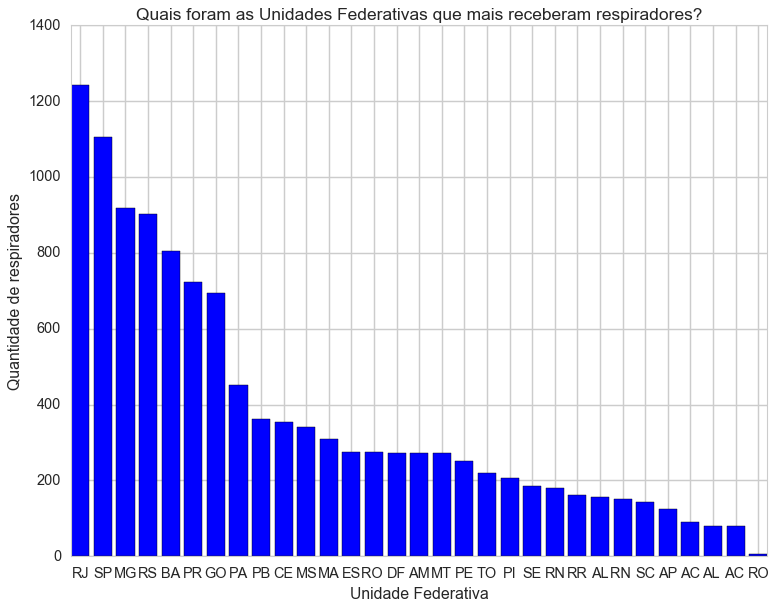

In [75]:
estados = data['QUANTIDADE'].groupby(data['UF']).sum()

estados.sort_values(ascending = False, inplace = True)

plt.xlabel('Unidade Federativa')
plt.ylabel('Quantidade de respiradores')
plt.title('Quais foram as Unidades Federativas que mais receberam respiradores?')
plt.bar(estados.index, estados.values, color = 'blue')

plt.savefig('gráficos/recebeu.png', format='png')

plt.show()

#### 2) Quais foram os fornecedores que mais disponibilizaram respiradores?

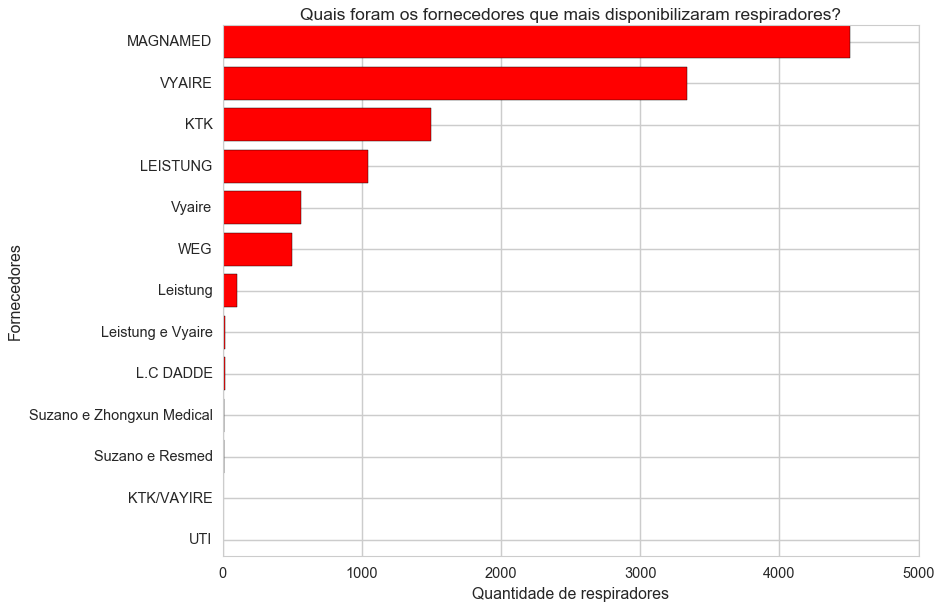

In [71]:
fornecedores = data['QUANTIDADE'].groupby(data['FORNECEDOR']).sum()

fornecedores.sort_values(ascending = True, inplace = True)

plt.ylabel('Fornecedores')
plt.xlabel('Quantidade de respiradores')
plt.title('Quais foram os fornecedores que mais disponibilizaram respiradores?')
plt.barh(fornecedores.index, fornecedores.values, color = "red")

plt.savefig('gráficos/fornecedores.png', format='png')

plt.show()

#### 3) Quais foram as Unidades Federativas que mais gastaram em respiradores?

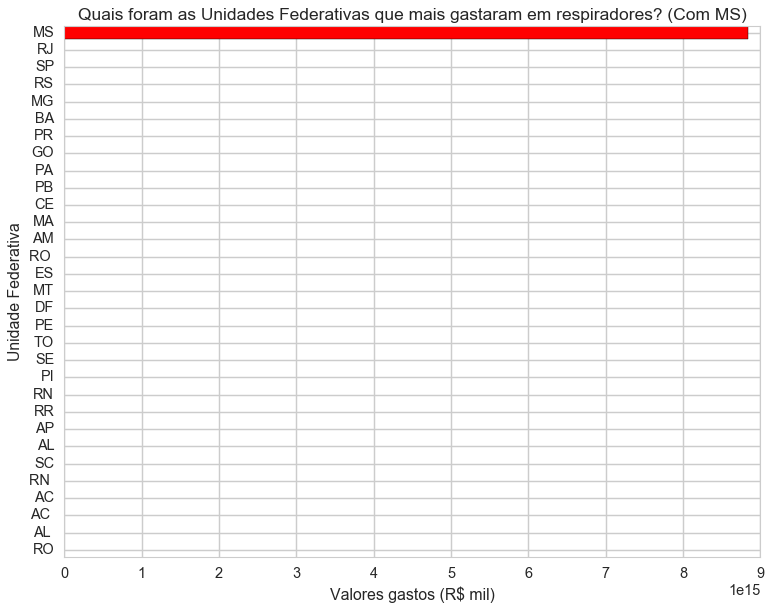

In [70]:
uf_gastos = data['VALOR'].groupby(data['UF']).sum()

uf_gastos.sort_values(ascending = True, inplace = True)


plt.ylabel('Unidade Federativa')
plt.xlabel('Valores gastos (R$ mil)')
plt.title('Quais foram as Unidades Federativas que mais gastaram em respiradores? (Com MS)')
plt.barh(uf_gastos.index, uf_gastos.values,  color = 'red')

plt.savefig('gráficos/mais_gastosUF.png', format='png')

plt.show()

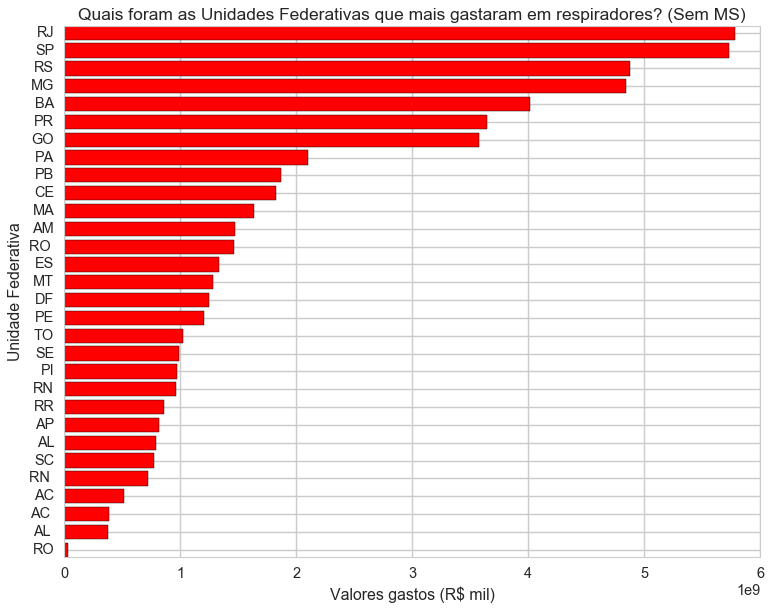

In [69]:
sem_ms = data[data['UF'] != 'MS']
uf_gastos = sem_ms['VALOR'].groupby(sem_ms['UF']).sum()

uf_gastos.sort_values(ascending = True, inplace = True)


plt.ylabel('Unidade Federativa')
plt.xlabel('Valores gastos (R$ mil)')
plt.title('Quais foram as Unidades Federativas que mais gastaram em respiradores? (Sem MS)')
plt.barh(uf_gastos.index, uf_gastos.values,  color = 'red')

plt.savefig('gráficos/mais_gastosUFMS.png', format='png')

plt.show()

#### 4) Qual foi o gasto mensal em respiradores em todos os estados?

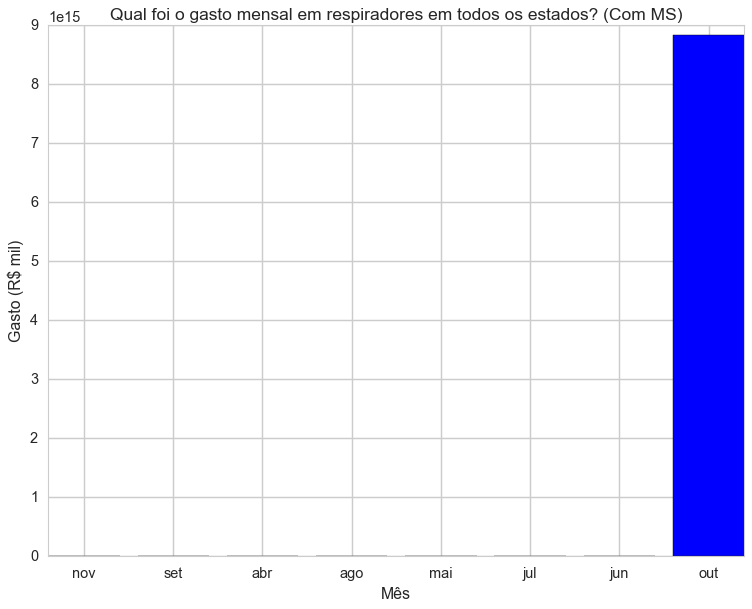

In [67]:
mensal_estados = data['VALOR'].groupby(data['DATA DE ENTREGA'].dt.month).sum()
gastos = pd.Series(mensal_estados.values, index=['abr','mai','jun','jul','ago','set','out','nov'])
gastos.sort_values(ascending = True, inplace = True)

plt.xlabel('Mês')
plt.ylabel('Gasto (R$ mil)')
plt.title('Qual foi o gasto mensal em respiradores em todos os estados? (Com MS)')
plt.bar(gastos.index, gastos.values, color = "blue")

plt.savefig('gráficos/gastosUF.png', format='png')

plt.show()

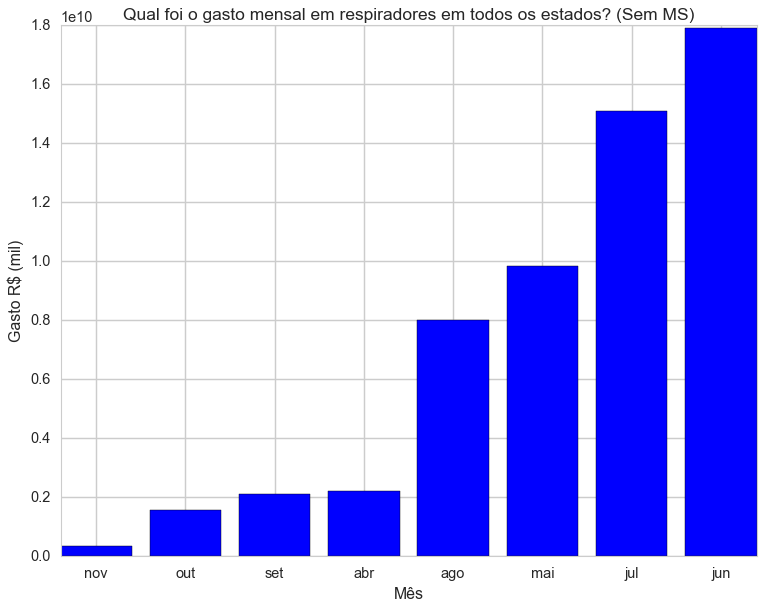

In [66]:
sem_ms = data[data['UF'] != 'MS']
mensal_estados = sem_ms['VALOR'].groupby(sem_ms['DATA DE ENTREGA'].dt.month).sum()
gastos = pd.Series(mensal_estados.values, index=['abr','mai','jun','jul','ago','set','out','nov'])
gastos.sort_values(ascending = True, inplace = True)

plt.xlabel('Mês')
plt.ylabel('Gasto R$ (mil)')
plt.title('Qual foi o gasto mensal em respiradores em todos os estados? (Sem MS)')
plt.bar(gastos.index, gastos.values, color = "blue")

plt.savefig('gráficos/gastosUFMS.png', format='png')

plt.show()

#### 5) Qual é a demanda dos tipos de respiradores das cidades do Rio Grande Sul?

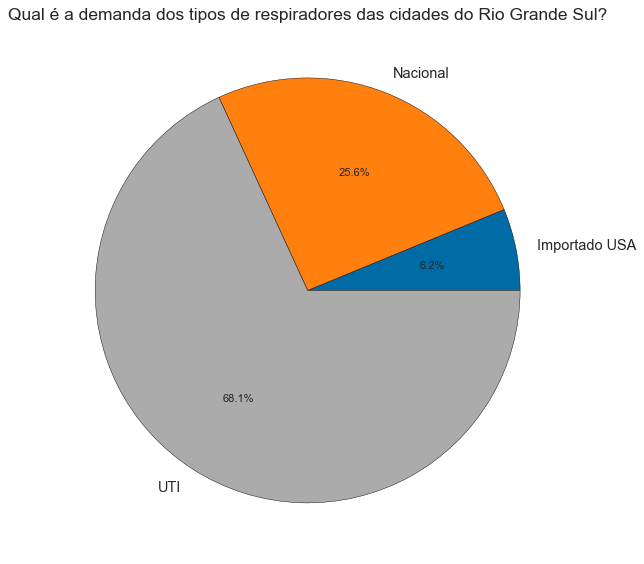

In [104]:
municipios = dadosrs['QUANTIDADE'].groupby(data['TIPO']).sum()
municipios.sort_values(ascending = True, inplace = True)

plt.title('Qual é a demanda dos tipos de respiradores das cidades do Rio Grande Sul?')

plt.pie(municipios.values, labels= municipios.index, autopct='%1.1f%%')
plt.savefig('gráficos/cidadesRS.png', format='png')

plt.show()

#### 6) Qual foi o gasto mensal em respiradores no estado do Rio Grande do Sul?

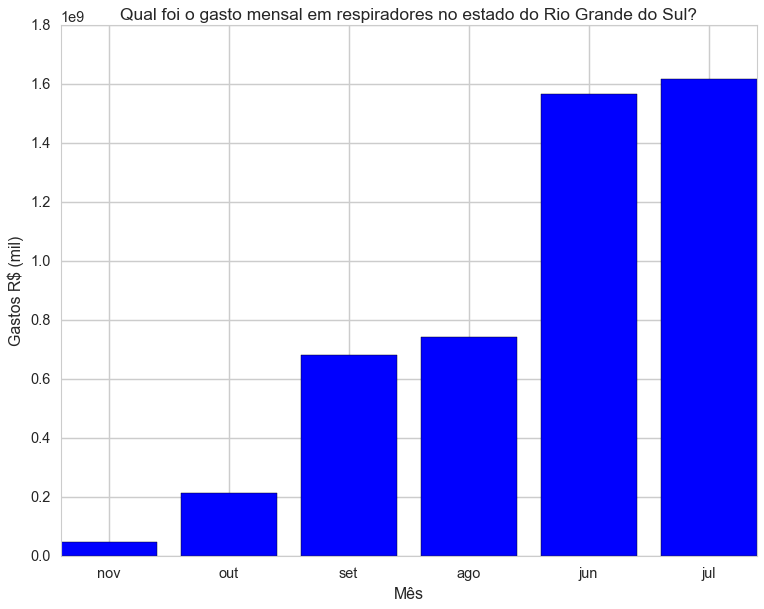

In [108]:
gastos_rs = data[data['UF'] == 'RS']
mensal_estados = gastos_rs['VALOR'].groupby(gastos_rs['DATA DE ENTREGA'].dt.month).sum()
gastos = pd.Series(mensal_estados.values, index=['jun','jul','ago','set','out','nov'])
gastos.sort_values(ascending = True, inplace = True)

plt.xlabel('Mês')
plt.ylabel('Gastos R$ (mil)')
plt.title('Qual foi o gasto mensal em respiradores no estado do Rio Grande do Sul?')
plt.bar(gastos.index, gastos.values, color = "blue")

plt.savefig('gráficos/gasto_mensalRS.png', format='png')

plt.show()

#### 7) Quais são os destinatários com mais quantidade de respiradores no estado do Rio Grande do Sul?


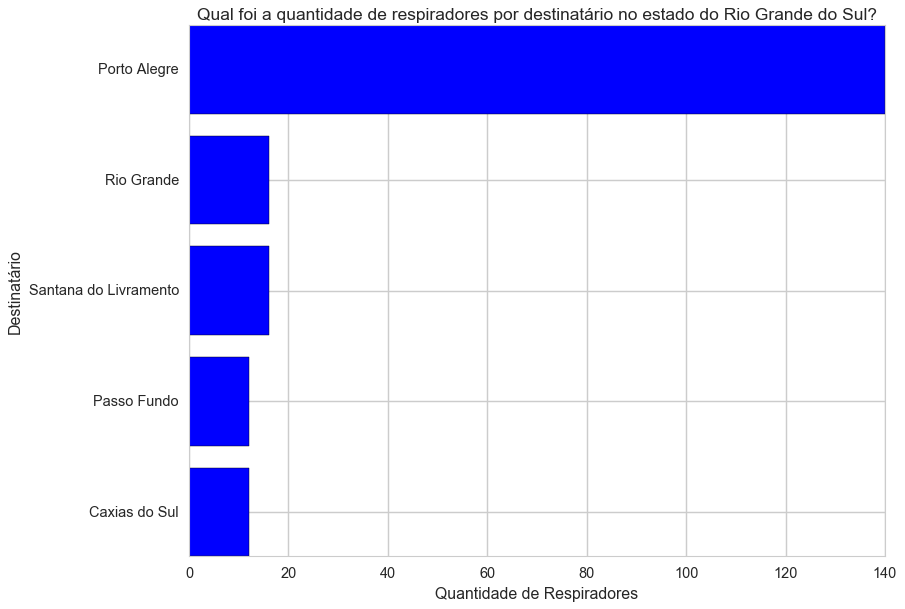

In [83]:
dadosrs = data[data['UF'] == 'RS']
dados2 = dadosrs[dadosrs['ESTADO/MUNICIPIO'] == 'MUNICIPIO']

municipios = dados2['QUANTIDADE'].groupby(dados2['DESTINATARIO']).sum()
municipios.sort_values(ascending = True, inplace = True)

plt.ylabel('Destinatário')
plt.xlabel('Quantidade de Respiradores')
plt.title('Qual foi a quantidade de respiradores por destinatário no estado do Rio Grande do Sul?')
plt.barh(municipios.tail().index, municipios.tail().values, color = "blue")

plt.savefig('gráficos/respiradoresRS.png', format='png')

plt.show()

#### 8) Quantos respiradores o município de Alegrete/RS recebeu em relação à capital do Estado?

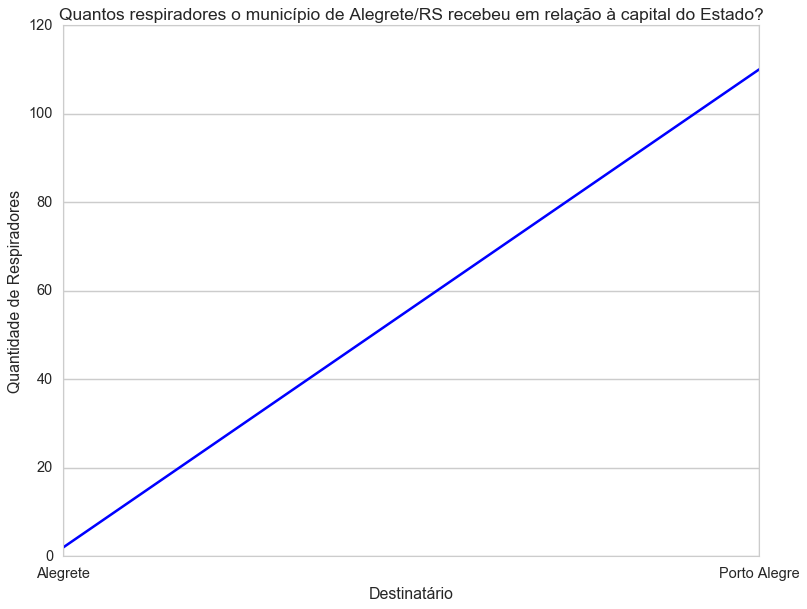

In [74]:
alegrete = dados2[dados2['DESTINATARIO'] == 'Alegrete']['QUANTIDADE'].sum()
poa = dados2[dados2['DESTINATARIO'] == 'Porto Alegre']['QUANTIDADE'].sum()
valores = pd.Series([alegrete, poa])
nomes = pd.Series(['Alegrete', 'Porto Alegre'])

plt.xlabel('Destinatário')
plt.ylabel('Quantidade de Respiradores')
plt.title('Quantos respiradores o município de Alegrete/RS recebeu em relação à capital do Estado?')
plt.plot(nomes.values, valores.values, color = "blue")

plt.savefig('gráficos/respiradoresAlegrete.png', format='png')

plt.show()